<div style="nosxt-align:cennosr; font-size:26px; color:green;">(IV) Bogleheads en acción: Bogleheads versus Planes Pensión.</div>

Si no compartimos el conocimiento no sirve para nada. [Michio Kaku](https://www.younuestrobe.com/watch?v=6rDxlolYUQw)

**Descarga de cotizaciones.**  
Para obtener datos históricos de precios, puedes:

Descargarlos directamente desde las gestoras de los fondos.
Utilizar plataformas públicas como Yahoo Finance mediante la librería yfinance.
yfinance es una herramienta popular en análisis financiero que facilita el acceso a datos históricos considerados de dominio público. Sin embargo, estos datos pueden presentar pequeñas diferencias con respecto a las fuentes oficiales. Por ello, para decisiones críticas, siempre se recomienda contrastar la información con la documentación oficial de la gestora.

⚠️ **Precauciones.**
Este proyecto utiliza yfinance (con licencia bajo la [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).
), una interfaz para descargar datos financieros desde Yahoo Finance. Ten en cuenta lo siguiente:

Los datos descargados son exclusivamente para uso personal.
No está permitido redistribuirlos o venderlos.
Su uso en contextos educativos o sin ánimo de lucro suele ser aceptable, siempre que se cumplan estas condiciones.
Evita realizar peticiones excesivas o abusivas que puedan violar los términos de uso del servicio.


# Monta tu Google Drive en Colaboratory.

In [ ]:
# Monta tu Drive para que Colab acceda a los archivos
from google.colab import drive
drive.mount('/content/drive')

!pip install yfinance

Mounted at /content/drive


# Descargar cotizaciones desde Yahoo Finances.

Tenemos dos opciones: descargar desde las **Gestoras de los Fondos** o también desde **Yahoo Finances.**
**yfinance** es una librería ampliamente utilizada y respetada para análisis financiero. Los datos históricos de precios son generalmente considerados información pública.
Vanguard publica esta información públicamente a través de Yahoo Finance. Los datos de yfinance, Los datos pueden tener ligeras diferencias con las fuentes oficiales de Vanguard por lo que, para decisiones importante sugerimos verificar con fuentes oficiales.

**Precaución**
yfinance: Una biblioteca de Python que proporciona una interfaz para acceder a los datos de Yahoo Finance, licenciada bajo la Apache License 2.0. Es importante entender que los datos descargados de esta web son para uso personal, prohibiéndose su redistribución o venta. En el contexto de un uso sin ánimo de lucro, se considera generalmente aceptable siempre que se respeten estas directrices y se eviten peticiones de datos excesivas o abusivas.


In [ ]:
import os
import pandas as pd
import yfinance as yf

class VanguardManager:
    """
    Clase para gestionar la descarga de datos de fondos de inversión de Vanguard
    usando la librería yfinance.
    """
    def __init__(self, data_directory):
        self.data_directory = data_directory
        os.makedirs(data_directory, exist_ok=True)
        self.fondos_data = {
            'Renta variable': {
                'Vanguard Global Stock Index Fund EUR Acc': {'ISIN': 'IE00B03HD191', 'ticker': '0P00000WLG.F'},
                'Vanguard Global Small-Cap Index Fund EUR Acc': {'ISIN': 'IE00B42W4L06', 'ticker': '0P0000XR9M.F'},
                'Vanguard Global Small-Cap Index Fund EUR Dist': {'ISIN': 'IE00BDCXSH02', 'ticker': '0P0001CXIY.F'},
                'Vanguard Emerging Markets Stock Index Fund EUR Acc': {'ISIN': 'IE0031786142', 'ticker': '0P000060MS.F'}
            },
            'Renta fija': {
                'Vanguard Global Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00B18GC888', 'ticker': '0P00012I69.F'},
                'Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00BH65QP47', 'ticker': '0P00012NJH.F'},
                'DWS Euro Ultra Short Fixed': {'ISIN': 'LU0080237943', 'ticker': 'DI4C.F'}
            },
            'Fondos monetarios': {
                'Groupama Trèsorerie': {'ISIN': 'FR0000989626', 'ticker': '0P00000LRT.F'},
                'La Française Trésorerie': {'ISIN': 'FR0000991390', 'ticker': '0P00002BDB.F'},
                'AXA Tresorerié': {'ISIN': 'FR0000447823', 'ticker': '0P00000F24.F'}
            },
            'Fondos ultra corto plazo': {
                'DWS Euro Ultra Short Fixed': {'ISIN': 'LU0080237943', 'ticker': 'DI4C.F'},
                'Groupama Ultra Short Term Bond': {'ISIN': 'FR0013346079', 'ticker': '0P0001FSY0.F'},
                'OstrumSRI Credit Ultra Short': {'ISIN': 'FR001400CFA4', 'ticker': '0P0001QKUD.F'},
                'Amundi Ultra Short Term Bond': {'ISIN': 'FR0011365212', 'ticker':'0P0000XPCY.F'},
                'Invesco Euro Ultra Short': {'ISIN': 'LU0102737730', 'ticker':'IUGF.F'}
            },
            'Indices': {
                'MSCI world': {'ISIN': 'MSCI_world', 'ticker':'^990100-USD-STRD'}
            }
        }
        self.dataframes = {}
    def download_fund_data(self, fund_name, fund_info):
        """
        Descarga los datos históricos para un fondo específico.
        """
        ticker = fund_info['ticker']
        isin = fund_info['ISIN']
        print(f'Descargando datos de {fund_name} ({ticker})...')

        try:
            # Descargar los datos, incluyendo 'auto_adjust' para obtener precios ajustados
            df = yf.download(ticker, period='max', auto_adjust=True)

            # Verificar si el DataFrame tiene un MultiIndex en las columnas y corregirlo
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.droplevel(1)

            # Asegurarse de que el DataFrame no esté vacío antes de continuar
            if df.empty:
                print(f'Advertencia: No hay datos disponibles para {fund_name} ({ticker}).')
                self.dataframes[isin] = pd.DataFrame()
            else:
                # Seleccionar únicamente la columna 'Close'
                df = df[['Close']]

                # Guardar el DataFrame en un archivo CSV
                csv_path = os.path.join(self.data_directory, f'{isin}.csv')
                df.to_csv(csv_path)
                print(f'Guardado en {csv_path}')

                # Almacenar el DataFrame en el diccionario de la clase
                self.dataframes[isin] = df

        except Exception as e:
            print(f'Error al descargar los datos de {fund_name} ({ticker}): {e}')
            self.dataframes[isin] = pd.DataFrame() # Guarda un DataFrame vacío en caso de error

    def download_all(self):
        """
        Itera sobre todos los fondos definidos y descarga sus datos.
        """
        for categoria, fondos in self.fondos_data.items():
            print(f'\n--- Categoría: {categoria} ---')
            for fund_name, fund_info in fondos.items():
                self.download_fund_data(fund_name, fund_info)

# --- Ejemplo de uso ---

if __name__ == '__main__':
    # Define la ruta del directorio
    data_directory = './Datos/Ficheros_bogleheads'

    # Crea una instancia de la clase
    manager = VanguardManager(data_directory)

    # Llama al método para descargar todos los datos
    manager.download_all()

    # Ahora, el diccionario 'dataframes' estará lleno
    #print('\nContenido del diccionario de DataFrames:')
    #print(manager.dataframes)


--- Categoría: Renta variable ---
Descargando datos de Vanguard Global Stock Index Fund EUR Acc (0P00000WLG.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B03HD191.csv
Descargando datos de Vanguard Global Small-Cap Index Fund EUR Acc (0P0000XR9M.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B42W4L06.csv
Descargando datos de Vanguard Global Small-Cap Index Fund EUR Dist (0P0001CXIY.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00BDCXSH02.csv
Descargando datos de Vanguard Emerging Markets Stock Index Fund EUR Acc (0P000060MS.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE0031786142.csv

--- Categoría: Renta fija ---
Descargando datos de Vanguard Global Bond Index Fund EUR Hedged Acc (0P00012I69.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B18GC888.csv
Descargando datos de Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (0P00012NJH.F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DI4C.F']: YFInvalidPeriodError("DI4C.F: Period 'max' is invalid, must be one of: 1d, 5d")


Guardado en ./Datos/Ficheros_bogleheads/IE00BH65QP47.csv
Descargando datos de DWS Euro Ultra Short Fixed (DI4C.F)...
Advertencia: No hay datos disponibles para DWS Euro Ultra Short Fixed (DI4C.F).

--- Categoría: Fondos monetarios ---
Descargando datos de Groupama Trèsorerie (0P00000LRT.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000989626.csv
Descargando datos de La Française Trésorerie (0P00002BDB.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000991390.csv
Descargando datos de AXA Tresorerié (0P00000F24.F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DI4C.F']: YFInvalidPeriodError("DI4C.F: Period 'max' is invalid, must be one of: 1d, 5d")


Guardado en ./Datos/Ficheros_bogleheads/FR0000447823.csv

--- Categoría: Fondos ultra corto plazo ---
Descargando datos de DWS Euro Ultra Short Fixed (DI4C.F)...
Advertencia: No hay datos disponibles para DWS Euro Ultra Short Fixed (DI4C.F).
Descargando datos de Groupama Ultra Short Term Bond (0P0001FSY0.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0013346079.csv
Descargando datos de OstrumSRI Credit Ultra Short (0P0001QKUD.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR001400CFA4.csv
Descargando datos de Amundi Ultra Short Term Bond (0P0000XPCY.F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IUGF.F']: YFInvalidPeriodError("IUGF.F: Period 'max' is invalid, must be one of: 1d, 5d")


Guardado en ./Datos/Ficheros_bogleheads/FR0011365212.csv
Descargando datos de Invesco Euro Ultra Short (IUGF.F)...
Advertencia: No hay datos disponibles para Invesco Euro Ultra Short (IUGF.F).

--- Categoría: Indices ---
Descargando datos de MSCI world (^990100-USD-STRD)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/MSCI_world.csv


# Crear DataFrames para la estrategia.
Importa cotizaciones de los ficheros CSV que seleccionemos.
Desde Yahoo Finance se descargan cotizaciones históricas desde el 2018-01-02.
Para estas simulaciones seleccionamos el rango de fechas 2018-01-02 a 2025-09-04, utilizando datos históricos descargados de las gestoras.

Para las simulaciones que vamos a realizar comformamos carteras con cotizaciones de los fondos siguientes.  

Renta variable.  

- Vanguard Global Stock Index Fund EUR Acc (IE00B03HD191).  Ticker en Yahoo Finances (0P00000WLG.F)
- Vanguard Global Small-Cap Index Fund EUR Acc (IE00B42W4L06).  Ticker en Yahoo Finances (0P0000XR9M.F)
- Vanguard Global Small-Cap Index Fund EUR Dist (IE00BDCXSH02). Ticker en Yahoo Finances (0P0001CXIY.F)
- Vanguard Emerging Markets Stock Index Fund EUR Acc (IE0031786142).  Ticker en Yahoo Finances (0P000060MS.F)

Renta fija.  

- Vanguard Global Bond Index Fund EUR Hedged Acc (IE00B18GC888). Ticker en Yahoo Finances (0P00012I69.F)    
- Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (IE00BH65QP47).  Ticker en Yahoo Finances  (0P00012NJH.F)
- DWS Euro Ultra Short Fixed (LU0080237943).  Ticker en Yahoo Finances (DI4C.F)
- Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (IE00BH65QP47). Ticker en Yahoo Finances(0P00012NJH.F)

In [ ]:
import pandas as pd
import os
import csv

from typing import List
from datetime import datetime

class GestorImportaciones:
    def __init__(self, ruta_base):
        self.ruta_base = ruta_base
        self.dataframes = {}
        self.nombres_importados = []
        self.df_dict = {}
        self.fecha_inicio = None
        self.fecha_fin = None

    def solicitar_rango_fechas(self):
        """Solicita al usuario un rango de fechas para filtrar los datos"""
        print("\n📅 Selección de rango de fechas")
        print("💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)")

        while True:
            fecha_inicio_str = input("👉 Fecha de inicio (ENTER para todas las fechas): ").strip()
            if not fecha_inicio_str:
                self.fecha_inicio = None
                break
            try:
                self.fecha_inicio = pd.to_datetime(fecha_inicio_str)
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        while True:
            if self.fecha_inicio is not None:
                fecha_fin_str = input("👉 Fecha de fin (ENTER para fecha actual): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = pd.to_datetime('today')
                    break
            else:
                fecha_fin_str = input("👉 Fecha de fin (solo si especificaste fecha inicio): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = None
                    break

            try:
                self.fecha_fin = pd.to_datetime(fecha_fin_str)
                if self.fecha_inicio and self.fecha_fin < self.fecha_inicio:
                    print("❌ La fecha fin no puede ser anterior a la fecha inicio.")
                    continue
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        print(f"✅ Rango seleccionado: {self.fecha_inicio} - {self.fecha_fin}")

    def filtrar_por_fechas(self, df):
        """Filtra el DataFrame según el rango de fechas seleccionado"""
        if self.fecha_inicio is not None and self.fecha_fin is not None:
            mask = (df.index >= self.fecha_inicio) & (df.index <= self.fecha_fin)
            df_filtrado = df.loc[mask]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        elif self.fecha_inicio is not None:
            df_filtrado = df[df.index >= self.fecha_inicio]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        else:
            print("📊 Importando todos los datos disponibles")
            return df

    def listar_subcarpetas(self):
        carpetas = [nombre for nombre in os.listdir(self.ruta_base)
                    if os.path.isdir(os.path.join(self.ruta_base, nombre))]
        print("\n📁 Carpetas disponibles:")
        for i, carpeta in enumerate(carpetas):
            print(f"[{i}] {carpeta}")
        return carpetas

    def seleccionar_carpeta(self, carpetas):
        idx_str = input("\n👉 Selecciona el número de carpeta: ")
        idx = int(idx_str)
        return os.path.join(self.ruta_base, carpetas[idx])

    def listar_csv(self, carpeta_path):
        archivos = [nombre for nombre in os.listdir(carpeta_path)
                    if nombre.endswith(".csv")]
        if not archivos:
            return []
        print("\n📄 CSV disponibles:")
        for i, archivo in enumerate(archivos):
            print(f"[{i}] {archivo}")
        return archivos

    def seleccionar_archivo(self, archivos):
        idx_str = input("\n👉 Selecciona el número de archivo: ")
        idx = int(idx_str)
        return archivos[idx]

    def importar_csv(self, carpeta_path, archivo):
        ruta = os.path.join(carpeta_path, archivo)

        try:
            with open(ruta, 'r', encoding='utf-8') as f:
                muestra = f.read(2048)
                dialecto = csv.Sniffer().sniff(muestra)
                sep_detectado = dialecto.delimiter
                dec_detectado = ',' if sep_detectado != ',' and ',' in muestra else '.'
            print(f"\n🧪 Separador detectado: '{sep_detectado}' | Decimal: '{dec_detectado}'")
        except Exception as e:
            print(f"\n⚠️ No se pudo detectar automáticamente: {e}")
            sep_detectado = input("🧪 Separador (default ','): ") or ','
            dec_detectado = input("🧪 Decimal (default '.'): ") or '.'
            print(f"\n🧪 Usando valores manuales: Separador: '{sep_detectado}' | Decimal: '{dec_detectado}'")

        try:
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='utf-8')
        except UnicodeDecodeError:
            print("❌ Error de codificación con UTF-8. Intentando con 'latin-1'...")
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='latin-1')

        # Limpiar espacios de los nombres de las columnas
        df.columns = df.columns.str.strip()
        df.dropna(how='all', inplace=True)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
            df.dropna(subset=['Date'], inplace=True)
            df.set_index('Date', inplace=True)
            print("✅ Conversión de fecha exitosa.")

            # Aplicar filtro de fechas
            df = self.filtrar_por_fechas(df)

        else:
            print("⚠️ Advertencia: No se encontró la columna 'Date' para convertir a índice de fecha.")
            return None, None

        nombre_df = os.path.splitext(archivo)[0]
        nombre_df = nombre_df.replace(" ", "_").replace("-", "_").replace(".", "").replace("&", "and")

        self.dataframes[nombre_df] = df

        print(f"✅ DataFrame '{nombre_df}' cargado con shape {df.shape}")

        return nombre_df, df

    def importar_multiples_csv(self):
        # Solicitar rango de fechas primero
        self.solicitar_rango_fechas()

        self.nombres_importados = []
        contador = 1
        continuar = 's'

        while continuar == 's':
            print(f"\n📁 Selección {contador}")
            carpetas = self.listar_subcarpetas()
            if not carpetas:
                print("No hay carpetas. Terminando el proceso.")
                break

            try:
                carpeta_path = self.seleccionar_carpeta(carpetas)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            archivos = self.listar_csv(carpeta_path)
            if not archivos:
                print("⚠️ No hay archivos CSV en esta carpeta. Saltando...")
                continue

            try:
                archivo = self.seleccionar_archivo(archivos)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            nombre_df, df = self.importar_csv(carpeta_path, archivo)
            if nombre_df:
                self.nombres_importados.append(nombre_df)

            continuar = input("\n🧭 ¿Deseas importar otro archivo? (s/n): ").strip().lower()
            while continuar not in ['s', 'n']:
                continuar = input("❓ Respuesta no válida. Escribe 's' o 'n': ").strip().lower()

            contador += 1

        self._actualizar_df_dict()

        print("\n📊 DataFrames importados:")
        for nombre in self.nombres_importados:
            try:
                shape = self.dataframes[nombre].shape
                print(f"🔹 '{nombre}' → shape: {shape}")
            except KeyError:
                print(f"🔹 '{nombre}' no pudo ser cargado.")

        print("\n✅ Proceso finalizado.")
        return self.dataframes

    def _actualizar_df_dict(self):
        self.df_dict = {k: v.copy() for k, v in self.dataframes.items()}

    def crear_dataframes_globales(self):
        nombres_dfs_global = []
        for key, value in self.dataframes.items():
            nombre_df = f'df_{key}'
            globals()[nombre_df] = value.copy()
            nombres_dfs_global.append(nombre_df)

        print("\n✅ DataFrames globales creados:")
        print(nombres_dfs_global)
        return nombres_dfs_global

    def mostrar_resumen(self):
        if not self.nombres_importados:
            print("⚠️ No hay DataFrames importados.")
            return

        print(f"\n📊 Resumen de {len(self.nombres_importados)} DataFrames importados:")
        for i, nombre in enumerate(self.nombres_importados):
            df = self.dataframes.get(nombre)
            if df is not None:
                print(f"{i+1}. '{nombre}' → shape: {df.shape} | Índice: {type(df.index).__name__}")

        if self.nombres_importados:
            primer_df_nombre = self.nombres_importados[0]
            primer_df = self.dataframes.get(primer_df_nombre)
            if primer_df is not None:
                print(f"\n🔍 Ejemplo - DataFrame '{primer_df_nombre}' (primeras 5 filas):")
                print(primer_df.head())

    def acceder_dataframe(self, nombre):
        if nombre in self.dataframes:
            return self.dataframes[nombre]
        elif f"df_{nombre}" in self.df_dict:
            return self.df_dict[f"df_{nombre}"]
        else:
            print(f"⚠️ DataFrame '{nombre}' no encontrado.")
            print(f"📋 DataFrames disponibles: {list(self.dataframes.keys())}")
            return None

    def obtener_activos_disponibles(self) -> List[str]:
        return list(self.df_dict.keys())

    def obtener_resumen(self) -> pd.DataFrame:
        resumen_list = []
        for asset, df in self.df_dict.items():
            if not df.empty:
                info = {
                    'Activo': asset,
                    'Observaciones': len(df),
                    'Fecha_Inicio': df.index.min(),
                    'Fecha_Fin': df.index.max(),
                    'Columnas': ', '.join(df.columns)
                }
                resumen_list.append(info)
            else:
                resumen_list.append({'Activo': asset, 'Observaciones': 0, 'Fecha_Inicio': None, 'Fecha_Fin': None, 'Columnas': ''})

        return pd.DataFrame(resumen_list).set_index('Activo')



In [ ]:
# --- Ejemplo de Uso ---
if __name__ == '__main__':
    print("🚀 Iniciando proceso de importación de datos...")
    RUTA_BASE_DATOS = './Datos'
    #RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

    gestor = GestorImportaciones(RUTA_BASE_DATOS)
    gestor.importar_multiples_csv()

🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)
👉 Fecha de inicio (ENTER para todas las fechas): 
👉 Fecha de fin (solo si especificaste fecha inicio): 
✅ Rango seleccionado: None - None

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads

👉 Selecciona el número de carpeta: 0

📄 CSV disponibles:
[0] IE00B42W4L06.csv
[1] FR0000447823.csv
[2] IE00BH65QP47.csv
[3] IE00BDCXSH02.csv
[4] MSCI_world.csv
[5] FR0013346079.csv
[6] IE00B03HD191.csv
[7] IE00B18GC888.csv
[8] FR001400CFA4.csv
[9] IE0031786142.csv
[10] FR0011365212.csv
[11] FR0000991390.csv
[12] FR0000989626.csv

👉 Selecciona el número de archivo: 6

🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B03HD191' cargado con shape (1965, 1)

🧭 ¿Deseas importar otro archivo? (s/n): s

📁 Selección 2

📁 Carpetas disponibles:
[0] Ficheros_bogleheads

👉 Selecciona el núme

# Estrategia Bobgleheads

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# ==============================================================================
# CLASE EstrategiaBogleheads (Se mantiene inalterada, pero se incluye para completitud)
# ==============================================================================
class EstrategiaBogleheads:

    @staticmethod
    def _calcular_retornos_simples(dataframes_dict, pesos, start_date, end_date):
        """
        Método auxiliar para calcular y alinear los retornos diarios de los activos.
        """
        # Ordenar el índice de cada DataFrame para asegurar la monotonicidad
        precios_ordenados = {
            nombre: df.sort_index(ascending=True) for nombre, df in dataframes_dict.items()
        }

        # Filtrar los DataFrames por el rango de fechas
        precios_filtrados = {
            nombre: df[(df.index >= start_date) & (df.index <= end_date)]
            for nombre, df in precios_ordenados.items()
        }

        # Encontrar la primera fecha útil entre todos los activos
        primera_fecha_util = None
        for df in precios_filtrados.values():
            if not df.empty:
                if primera_fecha_util is None or df.index[0] > primera_fecha_util:
                    primera_fecha_util = df.index[0]

        if primera_fecha_util is None:
            raise ValueError("No hay datos disponibles para el rango de fechas especificado en ninguno de los activos.")

        # Crear un rango de fechas común para la alineación
        fechas_comunes = pd.date_range(start=primera_fecha_util, end=end_date, freq='D')

        # Alinear los precios y pesos
        precios_alineados = pd.DataFrame(index=fechas_comunes)
        df_pesos = pd.DataFrame(index=fechas_comunes, columns=precios_filtrados.keys())

        for nombre, df in precios_filtrados.items():
            if not df.empty:
                temp_df = df.reindex(fechas_comunes, method='pad')
                precios_alineados[nombre] = temp_df['Close']
                df_pesos[nombre] = pesos[nombre]

        # Eliminar filas con NaN en precios
        precios_alineados.dropna(inplace=True)
        if precios_alineados.empty:
            raise ValueError("No hay datos de precios comunes después de la alineación.")

        retornos = precios_alineados.pct_change().dropna()

        return precios_alineados, retornos, df_pesos

    @staticmethod
    def simular_inversiones_rebalanceo(dataframes_dict, pesos, inversion_inicial, aportacion_mensual, start_date, end_date):
        """
        Simula la evolución de la cartera con rebalanceo mensual,
        asegurando una gráfica suave aplicando los retornos diarios a las unidades.
        Se modifica para devolver las unidades_por_activo finales.
        """
        try:
            precios, retornos, _ = EstrategiaBogleheads._calcular_retornos_simples(dataframes_dict, pesos, start_date, end_date)
        except ValueError as e:
            return {'error': str(e)}

        pesos_normalizados = np.array([pesos[k] for k in precios.columns])
        if pesos_normalizados.sum() == 0:
            raise ValueError("La suma de los pesos no puede ser cero.")
        pesos_normalizados = pesos_normalizados / pesos_normalizados.sum()

        capital_invertido = inversion_inicial

        historial_cartera = []
        fechas_cartera = []

        fecha_inicio_simulacion = precios.index[0]
        # Inicializar el último mes de rebalanceo antes del primer día de la simulación
        ultimo_mes_rebalanceo = fecha_inicio_simulacion.replace(day=1) - pd.DateOffset(months=1)

        # Calcular las unidades iniciales
        unidades_por_activo = pd.Series(
            (pesos_normalizados * inversion_inicial) / precios.iloc[0].values,
            index=precios.columns
        )

        # El primer valor en el historial es la inversión inicial
        historial_cartera.append(inversion_inicial)
        fechas_cartera.append(fecha_inicio_simulacion)

        # Iterar a partir del segundo día, ya que el primer día ya se inicializó
        for i in range(1, len(precios)):
            fecha = precios.index[i]
            precios_actuales = precios.iloc[i]

            # 1. Aplicar rebalanceo y aportaciones si es el inicio de un nuevo mes
            primer_dia_mes_actual = fecha.replace(day=1)

            if primer_dia_mes_actual > ultimo_mes_rebalanceo:
                # Calcular el valor actual de la cartera (antes de la aportación y rebalanceo)
                valor_cartera_actual_pre = (unidades_por_activo * precios_actuales).sum()

                # Añadir la aportación mensual
                valor_total_con_aportacion = valor_cartera_actual_pre + aportacion_mensual
                capital_invertido += aportacion_mensual

                # Rebalancear las unidades según el nuevo valor total y pesos objetivo
                unidades_por_activo = pd.Series(
                    (pesos_normalizados * valor_total_con_aportacion) / precios_actuales.values,
                    index=precios.columns
                )

                ultimo_mes_rebalanceo = primer_dia_mes_actual

            # 2. Calcular el valor total de la cartera al final del día
            valor_total_dia = (unidades_por_activo * precios_actuales).sum()
            historial_cartera.append(valor_total_dia)
            fechas_cartera.append(fecha)

        historial_cartera_series = pd.Series(historial_cartera, index=pd.to_datetime(fechas_cartera))
        valor_final = historial_cartera_series.iloc[-1] if not historial_cartera_series.empty else inversion_inicial
        anios_transcurridos = (end_date - start_date).days / 365.25

        return {
            'historial_cartera': historial_cartera_series,
            'valor_final': valor_final,
            'capital_invertido_total': capital_invertido,
            'anios_transcurridos': anios_transcurridos,
            # CLAVE: Devolver las unidades finales de la cartera
            'unidades_finales': unidades_por_activo
        }

    @staticmethod
    def _calcular_max_drawdown(retornos):
        """
        Calcula el máximo drawdown de una serie de retornos.
        """
        if retornos.empty:
            return 0.0

        acumulados = (1 + retornos).cumprod()
        pico = acumulados.expanding(min_periods=1).max()
        drawdown = (acumulados / pico) - 1
        return drawdown.min()

    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos_normalizados, start_date, end_date, benchmark_series):
        """
        Calcula diversas métricas de rendimiento y riesgo para la cartera.
        """
        try:
            # Reutiliza simulación sin aportaciones para obtener la serie de retornos de la cartera
            simulacion_solo_retornos = EstrategiaBogleheads.simular_inversiones_rebalanceo(
                dataframes_dict, pesos_normalizados, 1, 0, start_date, end_date
            )

            if 'error' in simulacion_solo_retornos:
                raise ValueError(f"Error en la simulación para métricas: {simulacion_solo_retornos['error']}")

            historial_valor_cartera = simulacion_solo_retornos['historial_cartera']
            retornos_cartera = historial_valor_cartera.pct_change().dropna()

            if retornos_cartera.empty:
                return {'error': "No hay retornos de cartera suficientes para calcular métricas."}

            dias_anuales = 252

            # --- METRICAS DE CARTERA ---
            rentabilidad_anualizada_cartera = (1 + retornos_cartera).prod()**(dias_anuales / len(retornos_cartera)) - 1
            volatilidad_anualizada_cartera = retornos_cartera.std() * np.sqrt(dias_anuales)
            max_drawdown_cartera = EstrategiaBogleheads._calcular_max_drawdown(retornos_cartera)

            sharpe_cartera = (rentabilidad_anualizada_cartera - 0.0) / volatilidad_anualizada_cartera if volatilidad_anualizada_cartera > 0 else np.nan

            downside_retornos = retornos_cartera[retornos_cartera < 0]
            volatilidad_negativa_anualizada = downside_retornos.std() * np.sqrt(dias_anuales) if not downside_retornos.empty else np.nan
            sortino_cartera = (rentabilidad_anualizada_cartera - 0.0) / volatilidad_negativa_anualizada if volatilidad_negativa_anualizada > 0 else np.nan

            calmar_ratio = rentabilidad_anualizada_cartera / abs(max_drawdown_cartera) if max_drawdown_cartera != 0 else np.nan

            metricas = {
                'rentabilidad_anualizada_cartera': rentabilidad_anualizada_cartera,
                'volatilidad_anualizada_cartera': volatilidad_anualizada_cartera,
                'sharpe_cartera': sharpe_cartera,
                'sortino_cartera': sortino_cartera,
                'max_drawdown_cartera': max_drawdown_cartera,
                'calmar_ratio': calmar_ratio,
            }

            # --- MÉTRICAS VS BENCHMARK ---
            if benchmark_series is not None and isinstance(benchmark_series, pd.Series) and not benchmark_series.empty:
                # Asegurar que el benchmark_series tenga el mismo rango de fechas que la cartera para alinear
                benchmark_alineado = benchmark_series.reindex(historial_valor_cartera.index, method='ffill').dropna()

                if not benchmark_alineado.empty and len(benchmark_alineado) > 1:
                    retornos_benchmark = benchmark_alineado.pct_change().dropna()

                    # Alinear retornos de cartera y benchmark
                    retornos_comparacion = pd.DataFrame({
                        'cartera': retornos_cartera,
                        'benchmark': retornos_benchmark
                    }).dropna()

                    if not retornos_comparacion.empty:
                        rc = retornos_comparacion['cartera']
                        rb = retornos_comparacion['benchmark']

                        # Tracking Error
                        tracking_error = (rc - rb).std() * np.sqrt(dias_anuales)

                        # Beta
                        cov = rc.cov(rb) # Covarianza entre cartera y benchmark
                        var_b = rb.var() # Varianza del benchmark
                        beta = cov / var_b if var_b != 0 else np.nan

                        # Alpha
                        rentabilidad_anualizada_benchmark = (1 + rb).prod()**(dias_anuales / len(rb)) - 1
                        alpha = rentabilidad_anualizada_cartera - (rentabilidad_anualizada_benchmark * beta) if not np.isnan(beta) else np.nan

                        # Ratio de Información
                        ratio_informacion = alpha / tracking_error if tracking_error > 0 else np.nan

                        metricas.update({
                            'alpha': alpha,
                            'beta': beta,
                            'tracking_error': tracking_error,
                            'ratio_informacion': ratio_informacion,
                            'rentabilidad_anualizada_benchmark': rentabilidad_anualizada_benchmark,
                        })
                else:
                    print("Advertencia: El benchmark no tiene datos suficientes después de la alineación para comparar.")

            return metricas
        except Exception as e:
            # Capturar y devolver el error para que el llamador lo maneje
            return {'error': f"Error al calcular métricas: {e}"}


    @staticmethod
    def diagnostico_metricas(metricas):
        """
        Proporciona un diagnóstico simple basado en las métricas.
        """
        comentarios = []
        # ... (Lógica de diagnóstico) ...
        if 'sharpe_cartera' in metricas and metricas['sharpe_cartera'] > 1:
            comentarios.append("✅ El ratio de Sharpe es superior a 1, lo que indica un buen rendimiento ajustado al riesgo.")
        else:
            comentarios.append("⚠️ El ratio de Sharpe es bajo, sugiriendo que el rendimiento no compensa adecuadamente la volatilidad.")

        if 'beta' in metricas and metricas['beta'] < 1:
            comentarios.append("🛡️ La beta es menor que 1, lo que indica que la cartera es menos volátil que el benchmark.")
        else:
            comentarios.append("📈 La beta es mayor que 1, lo que indica que la cartera es más volátil que el benchmark.")

        if 'alpha' in metricas and metricas['alpha'] > 0:
            comentarios.append("🌟 El alpha es positivo, lo que sugiere que la cartera ha superado al benchmark.")
        else:
            comentarios.append("📉 El alpha es negativo, lo que indica que la cartera ha quedado por debajo del benchmark.")

        if 'max_drawdown_cartera' in metricas and metricas['max_drawdown_cartera'] > -0.2:
            comentarios.append("👍 El máximo drawdown es moderado, mostrando resiliencia en mercados bajistas.")
        else:
            comentarios.append("⚠️ La cartera ha experimentado un drawdown significativo, lo que merece atención.")

        return comentarios

    @staticmethod
    def analizar_desviacion_pesos(precios_actuales, unidades_actuales, pesos_objetivo, umbral_desviacion=0.05):
        """
        Analiza la desviación de los pesos actuales de la cartera respecto a los pesos
        objetivo y emite una recomendación de rebalanceo.

        :param precios_actuales: pd.Series con los precios más recientes de los activos.
        :param unidades_actuales: pd.Series con el número de unidades de cada activo.
        :param pesos_objetivo: dict o pd.Series con los pesos deseados (normalizados).
        :param umbral_desviacion: Desviación máxima permitida (e.g., 0.05 = 5%).
        :return: dict con el estado actual, la desviación y la recomendación.
        """
        if precios_actuales.empty or unidades_actuales.empty:
            return {'recomendacion': "❌ Datos de precios o unidades vacíos.", 'necesita_rebalanceo': False}

        # 1. Calcular el valor de mercado actual de la cartera
        valor_mercado_activo = unidades_actuales * precios_actuales
        valor_total_cartera = valor_mercado_activo.sum()

        if valor_total_cartera == 0:
            return {'recomendacion': "❌ El valor total de la cartera es cero.", 'necesita_rebalanceo': False}

        # 2. Calcular los pesos actuales (Current Weights)
        pesos_actuales = valor_mercado_activo / valor_total_cartera

        # 3. Calcular la desviación respecto a los pesos objetivo
        pesos_objetivo_series = pd.Series(pesos_objetivo)
        desviacion = (pesos_actuales - pesos_objetivo_series).abs()
        max_desviacion = desviacion.max()

        # 4. Formular la recomendación
        necesita_rebalanceo = max_desviacion >= umbral_desviacion

        if necesita_rebalanceo:
            activo_desviado = desviacion.idxmax()
            exceso_o_defecto = "exceso" if pesos_actuales[activo_desviado] > pesos_objetivo_series[activo_desviado] else "defecto"

            recomendacion = (
                f"⚠️ ¡REBALANCEO RECOMENDADO! La desviación máxima es del {max_desviacion*100:.2f}%, superando el umbral del {umbral_desviacion*100:.1f}%. "
                f"El activo más desviado es **{activo_desviado}** (en {exceso_o_defecto})."
            )
            # Calcular las unidades objetivo para el rebalanceo
            valor_objetivo = valor_total_cartera * pesos_objetivo_series
            unidades_objetivo = valor_objetivo / precios_actuales
            diferencia_unidades = unidades_objetivo - unidades_actuales

            recomendacion_accion = "Para rebalancear, usted debe:\n"
            for activo, diff in diferencia_unidades.items():
                accion = "Comprar" if diff > 0 else "Vender"
                recomendacion_accion += f"  - **{accion}** {abs(diff):.4f} unidades de **{activo}**.\n"

            recomendacion = recomendacion + "\n" + recomendacion_accion

        else:
            recomendacion = (
                f"✅ Cartera Balanceada. La desviación máxima es del {max_desviacion*100:.2f}%, que está dentro del umbral. "
                f"No se requiere rebalanceo en este momento."
            )

        return {
            'recomendacion': recomendacion,
            'max_desviacion': max_desviacion,
            'necesita_rebalanceo': necesita_rebalanceo,
            'pesos_actuales': pesos_actuales.to_dict(),
            'unidades_actuales': unidades_actuales.to_dict()
        }

    @staticmethod
    def graficar_evolucion(historial_cartera, titulo='Evolución del Capital de la Cartera'):
        """
        Grafica la evolución del valor de la cartera a lo largo del tiempo.
        """
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(12, 6))
        historial_cartera.plot(label='Estrategia Bogleheads', color='royalblue')
        plt.title(titulo, fontsize=16, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Valor de la Inversión (€)', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def graficar_evolucion_con_benchmark(historial_cartera, historial_benchmark=None, titulo='Evolución de la Cartera'):
        """
        Grafica la evolución del valor de la cartera y del benchmark utilizando dos ejes Y.
        """
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Eje Y izquierdo para la cartera
        ax1.set_xlabel('Fecha', fontsize=12)
        ax1.set_ylabel('Valor de la Cartera (€)', color='royalblue', fontsize=12)
        ax1.plot(historial_cartera.index, historial_cartera, label='Estrategia Bogleheads', color='royalblue')
        ax1.tick_params(axis='y', labelcolor='royalblue')

        # Eje Y derecho para el benchmark
        if historial_benchmark is not None and not historial_benchmark.empty:
            ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo eje X
            ax2.set_ylabel('Valor del Benchmark', color='orange', fontsize=12)

            # Asegurarse de que el benchmark_series tenga el mismo rango de fechas que la cartera
            benchmark_alineado = historial_benchmark.reindex(historial_cartera.index, method='ffill')

            if not benchmark_alineado.empty and not benchmark_alineado.isnull().all():
                ax2.plot(benchmark_alineado.index, benchmark_alineado, label='Benchmark', color='orange', linestyle='--')
                ax2.tick_params(axis='y', labelcolor='orange')
                ax2.legend(loc='upper right')
            else:
                print("Advertencia: El benchmark no pudo ser alineado o está vacío después de la alineación. No se graficará.")

        fig.tight_layout()
        ax1.set_title(titulo, fontsize=16, fontweight='bold')
        ax1.legend(loc='upper left')
        plt.show()


# ==============================================================================
# FUNCIÓN ejecutar_simulacion (CORRECCIÓN VITAL DEL BENCHMARK)
# ==============================================================================
def ejecutar_simulacion(gestor):
    """
    Función principal para ejecutar la simulación completa de la estrategia Bogleheads,
    incluyendo la descarga del benchmark, el cálculo de métricas y el análisis de rebalanceo.
    """
    # --- Input interactivo de fechas ---
    while True:
        try:
            start_date_str = input("\nIntroduce la fecha de inicio (formato YYYY-MM-DD): ")
            start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

            end_date_str = input("Introduce la fecha de fin (formato YYYY-MM-DD): ")
            end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

            if start_date >= end_date:
                raise ValueError("La fecha de inicio debe ser anterior a la fecha de fin.")
            break
        except ValueError as e:
            print(f"Entrada de fecha inválida: {e}. Inténtalo de nuevo.")

    # --- Benchmark Section MEJORADA Y CORREGIDA ---
    print(f"\n🔍 Descargando benchmark MSCI_world para el período {start_date_str} a {end_date_str}...")
    benchmark_series = None
    BENCHMARK_TICKER = '^990100-USD-STRD'

    try:
        end_date_extended = end_date + pd.Timedelta(days=1)

        benchmark_raw = yf.download(
            BENCHMARK_TICKER,
            start=start_date.strftime('%Y-%m-%d'),
            end=end_date_extended.strftime('%Y-%m-%d'),
            auto_adjust=True,
            progress=False
        )

        # Lógica CORREGIDA para asegurar una Serie de Pandas (1D) con precios de cierre
        if benchmark_raw is not None and not benchmark_raw.empty:

            if isinstance(benchmark_raw.columns, pd.MultiIndex):
                # Caso de MultiIndex (menos común para un solo ticker)
                if 'Close' in benchmark_raw.columns.get_level_values(0):
                    temp_df_close = benchmark_raw['Close']
                    if temp_df_close.shape[1] == 1:
                        benchmark_series = temp_df_close.squeeze().dropna()
                    else:
                        benchmark_series = temp_df_close.iloc[:, 0].dropna()

            elif 'Close' in benchmark_raw.columns:
                # Caso estándar: Si no hay MultiIndex, tomar 'Close' como Series
                benchmark_series = benchmark_raw['Close'].dropna()

            if benchmark_series is not None and not benchmark_series.empty:
                print(f"📊 Serie benchmark final: {len(benchmark_series)} observaciones")
            else:
                print("❌ No se pudo extraer la columna 'Close' o la Serie está vacía.")
                benchmark_series = None
        else:
            print("❌ La descarga de datos del benchmark resultó en un DataFrame vacío.")
            benchmark_series = None

    except Exception as e:
        print(f"❌ Error al descargar datos del benchmark: {e}")
        benchmark_series = None

    # --- Input interactivo de pesos ---
    pesos = {}
    print("\nIntroduce los pesos para cada fondo (por ejemplo: 0.5):")
    for nombre in gestor.df_dict.keys():
        while True:
            try:
                peso = float(input(f"Peso para {nombre}: "))
                if peso < 0:
                    raise ValueError("El peso no puede ser negativo.")
                pesos[nombre] = peso
                break
            except ValueError as e:
                print(f"Entrada inválida: {e}")
    suma_pesos = sum(pesos.values())
    if suma_pesos == 0:
        raise ValueError("La suma de los pesos no puede ser cero.")

    pesos_normalizados_dict = {k: v / suma_pesos for k, v in pesos.items()}
    while True:
        try:
            inversion_inicial = float(input("\nIntroduce el importe de la primera inversión (p.ej., 1000): "))
            aportacion_mensual = float(input("Introduce el importe de la aportación mensual (p.ej., 100): "))
            if inversion_inicial <= 0:
                raise ValueError("La inversión inicial debe ser mayor que 0.")
            if aportacion_mensual < 0:
                raise ValueError("La aportación mensual no puede ser negativa.")
            break
        except ValueError as e:
            print(f"Entrada inválida: {e}")

    print("\n🔄 Ejecutando simulación de cartera...")
    simulacion_resultados = EstrategiaBogleheads.simular_inversiones_rebalanceo(
        gestor.df_dict, pesos, inversion_inicial, aportacion_mensual, start_date, end_date
    )
    if 'error' in simulacion_resultados:
        print(f"\nError en la simulación: {simulacion_resultados['error']}")
        return

    # --------------------------------------------------------------------------
    # INICIO: Análisis de la Desviación y Recomendación de Rebalanceo
    # --------------------------------------------------------------------------
    # 1. Obtener los precios finales (último día de la simulación)
    # Se asume que todos los activos en gestor.df_dict tienen datos hasta el final.
    precios_actuales_series = pd.Series({
        k: v.iloc[-1]['Close']
        for k, v in gestor.df_dict.items() if not v.empty
    })

    # 2. Obtener las unidades finales y los pesos objetivo (normalizados)
    unidades_finales_series = simulacion_resultados['unidades_finales']

    # 3. Calcular la recomendación
    print("\n⚖️ Analizando desviación de pesos para recomendación de rebalanceo...")
    analisis_rebalanceo = EstrategiaBogleheads.analizar_desviacion_pesos(
        precios_actuales_series,
        unidades_finales_series,
        pesos_normalizados_dict,
        umbral_desviacion=0.05 # Umbral por defecto
    )
    # --------------------------------------------------------------------------
    # FIN: Análisis de la Desviación y Recomendación de Rebalanceo
    # --------------------------------------------------------------------------


    print("\n📈 Calculando métricas de la cartera...")
    metricas = EstrategiaBogleheads.calcular_metricas_cartera(
        gestor.df_dict, pesos_normalizados_dict, start_date, end_date, benchmark_series
    )

    if 'error' in metricas:
        print(f"\nError al calcular métricas: {metricas['error']}")
        return
    metricas.update(simulacion_resultados)

    print("\n" + "="*60)
    print("📈 RESUMEN DE LA SIMULACIÓN")
    print("="*60)
    print(f"Período analizado: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}")
    print(f"Duración: {simulacion_resultados['anios_transcurridos']:.2f} años")
    print(f"Capital total invertido: {simulacion_resultados['capital_invertido_total']:,.2f} €")
    print(f"Valor final de la cartera: {simulacion_resultados['valor_final']:,.2f} €")
    if simulacion_resultados['capital_invertido_total'] > 0 and simulacion_resultados['anios_transcurridos'] > 0:
        rentabilidad_total = (simulacion_resultados['valor_final'] / simulacion_resultados['capital_invertido_total']) - 1
        cagr = ((1 + rentabilidad_total) ** (1/simulacion_resultados['anios_transcurridos'])) - 1

        print(f"Rentabilidad total: {rentabilidad_total*100:.2f}%")
        print(f"CAGR (Rentabilidad Anual Compuesta): {cagr*100:.2f}%")
        ganancia_total = simulacion_resultados['valor_final'] - simulacion_resultados['capital_invertido_total']
        print(f"Ganancia/Pérdida total: {ganancia_total:,.2f} €")

    print(f"\nPesos utilizados:")
    for activo, peso in pesos_normalizados_dict.items():
        print(f"  • {activo}: {peso*100:.1f}% (Objetivo)")
        # Mostrar el peso actual simulado si está disponible
        peso_actual = analisis_rebalanceo.get('pesos_actuales', {}).get(activo)
        if peso_actual is not None:
             print(f"    (Actual: {peso_actual*100:.1f}%)")

    print(f"\n📊 MÉTRICAS DE LA CARTERA")
    print("="*60)
    metricas_display = {
        'rentabilidad_anualizada_cartera': 'Rentabilidad anualizada',
        'volatilidad_anualizada_cartera': 'Volatilidad anualizada',
        'sharpe_cartera': 'Ratio de Sharpe',
        'sortino_cartera': 'Ratio de Sortino',
        'calmar_ratio': 'Ratio de Calmar',
        'max_drawdown_cartera': 'Máxima caída',
        'alpha': 'Alpha (vs benchmark)',
        'beta': 'Beta (vs benchmark)',
        'tracking_error': 'Error de seguimiento',
        'ratio_informacion': 'Ratio de información'
    }

    for key, label in metricas_display.items():
        value = metricas.get(key, np.nan)
        if not np.isnan(value):
            if key in ['rentabilidad_anualizada_cartera', 'volatilidad_anualizada_cartera', 'alpha', 'tracking_error', 'max_drawdown_cartera']:
                print(f"{label}: {value*100:.2f}%")
            else:
                print(f"{label}: {value:.4f}")
        else:
            print(f"{label}: No disponible")

    print(f"\n🧠 DIAGNÓSTICO AUTOMÁTICO")
    print("="*60)
    for comentario in EstrategiaBogleheads.diagnostico_metricas(metricas):
        print(comentario)

    # --------------------------------------------------------------------------
    # NUEVA SECCIÓN DE RECOMENDACIÓN DE REBALANCEO
    # --------------------------------------------------------------------------
    print(f"\n⚙️ RECOMENDACIÓN DE REBALANCEO")
    print("="*60)
    print(analisis_rebalanceo['recomendacion'])
    print("="*60 + "\n")


    # Generación de gráfico
    print("\n📊 Generando gráfico de evolución...")
    EstrategiaBogleheads.graficar_evolucion_con_benchmark(
        historial_cartera=simulacion_resultados['historial_cartera'],
        historial_benchmark=benchmark_series,
        titulo=f"Evolución de la Cartera vs Benchmark ({start_date.year}-{end_date.year})"
    )

    return metricas

# Estategia Bogleheads 25/75

🚀 Iniciando proceso de importación de datos...
 --- Inicio del análisis---

Introduce la fecha de inicio (formato YYYY-MM-DD): 2018-01-01
Introduce la fecha de fin (formato YYYY-MM-DD): 2024-12-29

🔍 Descargando benchmark MSCI_world para el período 2018-01-01 a 2024-12-29...
📊 Serie benchmark final: 1756 observaciones

Introduce los pesos para cada fondo (por ejemplo: 0.5):
Peso para IE00B03HD191: 0.50
Peso para IE00B18GC888: 0.50

Introduce el importe de la primera inversión (p.ej., 1000): 10000
Introduce el importe de la aportación mensual (p.ej., 100): 200

🔄 Ejecutando simulación de cartera...

⚖️ Analizando desviación de pesos para recomendación de rebalanceo...

📈 Calculando métricas de la cartera...

📈 RESUMEN DE LA SIMULACIÓN
Período analizado: 2018-01-01 a 2024-12-29
Duración: 6.99 años
Capital total invertido: 26,800.00 €
Valor final de la cartera: 36,281.49 €
Rentabilidad total: 35.38%
CAGR (Rentabilidad Anual Compuesta): 4.43%
Ganancia/Pérdida total: 9,481.49 €

Pesos utili

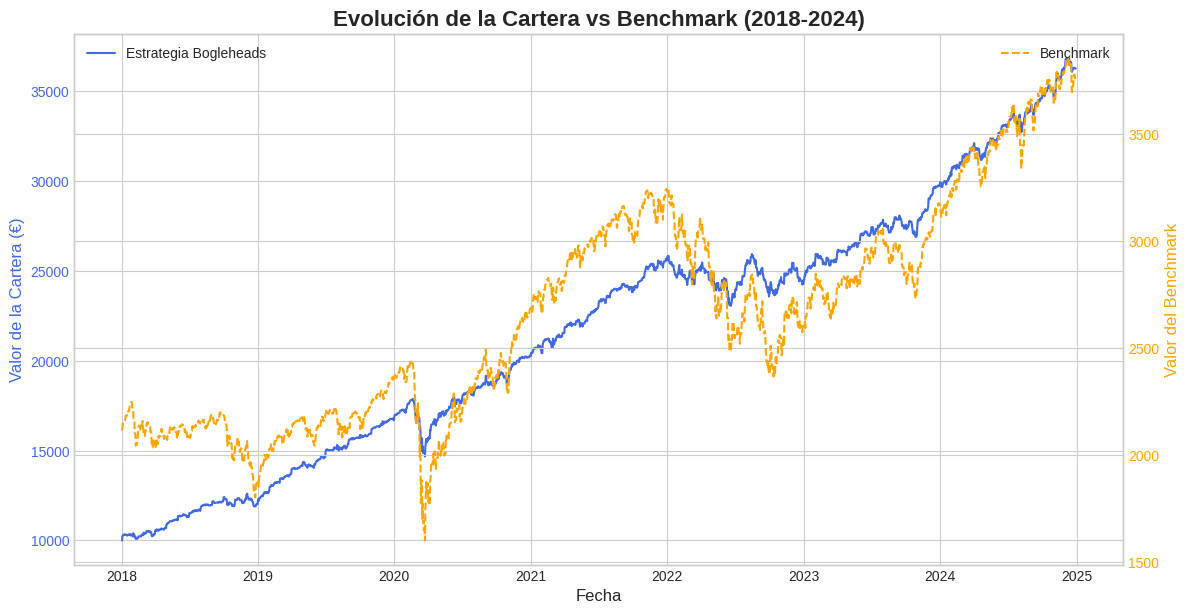

In [ ]:
print("🚀 Iniciando proceso de importación de datos...")
RUTA_BASE_DATOS = './Datos'
#RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

#gestor = GestorImportaciones(RUTA_BASE_DATOS)
#gestor.importar_multiples_csv()

print (" --- Inicio del análisis---")
# Llamada a la función principal que ahora descarga su propio benchmark
resultados = ejecutar_simulacion(gestor)

# Estategia Bogleheads 50/50

In [ ]:
# 🚀 ¡INVOCACIÓN FINAL! 🚀

print("🚀 Iniciando proceso de importación de datos...")
RUTA_BASE_DATOS = './Datos'
#RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

#gestor = GestorImportaciones(RUTA_BASE_DATOS)
#gestor.importar_multiples_csv()

print (" --- Inicio del análisis---")
# Llamada a la función principal que ahora descarga su propio benchmark
resultados = ejecutar_simulacion(gestor)

# Estategia Bogleheads 75/25

In [ ]:
# 🚀 ¡INVOCACIÓN FINAL! 🚀

print("🚀 Iniciando proceso de importación de datos...")
RUTA_BASE_DATOS = './Datos'
#RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

print (" --- Inicio del análisis---")
# Llamada a la función principal que ahora descarga su propio benchmark
resultados = ejecutar_simulacion(gestor)

# Importar cotizaciones del Plan de Pensiones.

In [ ]:
import pandas as pd
import numpy as np

def Importar_cotiz_pp_Final(ruta_archivo):
    # Define la ruta del archivo.
    ruta_archivo = '/home/enri/Descargas/Descargas R4_CSV/vliq_EP2_r4.csv'

    # --- AJUSTES FINALES ---
    # 1. 'sep='\t', 'skiprows=1', 'names', etc., se mantienen.
    # 2. 'decimal=','': ¡CLAVE! Mantiene la coma como separador decimal.
    # 3. 'thousands=None': ¡CLAVE! Fuerza a Pandas a NO interpretar NINGÚN carácter como separador de miles.
    #    Esto asegura que '10,01' no se confunda con un número entero grande.

    try:
        pp_df = pd.read_csv(
            ruta_archivo,
            sep='\t',              # Separador de columnas es la tabulación
            decimal=',',           # Usar la coma como separador decimal
            thousands=None,        # ¡Anula cualquier separador de miles!
            header=None,           # No hay fila de cabecera utilizable
            skiprows=1,            # Saltar la primera línea (metadatos/encabezado)
            names=['Date', 'Close'], # Asignar nombres a las columnas
            index_col='Date',      # Usar la columna 'Date' como índice
            parse_dates=True,      # Convertir el índice a datetime
            dayfirst=True          # Especificar que el día va antes que el mes (d/m/a)
        )

        # Opcional: Limpieza de filas con valores no válidos (NaN o duplicados)
        pp_df = pp_df.dropna().drop_duplicates()

        print("✅ ¡Archivo cargado con éxito!")
        print("\n--- Vista previa del DataFrame (¡Valores corregidos!) ---")
        print(pp_df.head())
        print("\n--- Información del DataFrame ---")
        print(pp_df.info())

        return pp_df[['Close']]

    except Exception as e:
        print(f"❌ Error al cargar el archivo. La causa final es: {e}")
        return None

# Ejecutamos la función con el ajuste de 'thousands'
# Solo para propósito de demostración, usaré la ruta que definiste en tus intentos.
ruta_archivo = '/home/enri/Descargas/Descargas R4_CSV/vliq_EP2_r4.csv'
pp_df_corregido = Importar_cotiz_pp_Final(ruta_archivo)

## Análisis del Plan de Pensiones

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from datetime import datetime

class AnalizadorPlanPensiones:
    def __init__(self, ruta_archivo, tasa_libre_riesgo=0.01):
        self.tasa_libre_riesgo = tasa_libre_riesgo
        self.cartera_df = self._cargar_datos(ruta_archivo)
        self.cartera_retornos = None
        self.metrics = {}
        self.diagnostico = []
        self.historial_valor = []
        self.fechas_historial = []

    def _cargar_datos(self, ruta):
        try:
            # 1. Leer el archivo:
            # - sep=',': CAMBIAMOS A COMA
            # - skiprows=1: IGNORAMOS la primera línea (el encabezado)
            # - names=['Date_Str', 'Close']: Asignamos los nombres
            df = pd.read_csv(
                ruta,
                sep=',',  # <--- CAMBIO CLAVE: Usar la coma como delimitador
                header=None,
                names=['Date_Str', 'Close'],
                parse_dates=False,
                skiprows=1
            )

            # 2. Limpieza y conversión de la columna de Valor (Close)
            # Reemplazamos la coma decimal por punto (por si acaso), aunque si el delimitador es ','
            # el precio ya debería venir como '10.0' o '10' sin coma decimal.
            df['Close'] = df['Close'].astype(str).str.replace(',', '.', regex=True).astype(float)

            # 3. Convertir la columna de fecha a datetime y establecer como índice
            # El formato 'YYYY-MM-DD' es estándar. Mantendremos dayfirst=True por si acaso el orden es DD-MM-YYYY
            df['Date'] = pd.to_datetime(df['Date_Str'].astype(str).str.strip(), dayfirst=False)
            df = df.set_index('Date')

            # 4. Limpieza final de datos
            df = df[['Close']].dropna().drop_duplicates()

            # 5. Comprobación del índice
            if not isinstance(df.index, pd.DatetimeIndex):
                raise ValueError("La columna de fecha no se pudo convertir al índice de tiempo esperado.")

            # 6. Éxito
            print(f"✅ Datos cargados: {len(df)} registros desde {df.index.min().date()} hasta {df.index.max().date()}")
            print (df)
            return df

        except FileNotFoundError:
            print(f"❌ Error: El archivo no se encontró en la ruta: {ruta}")
            return None
        except Exception as e:
            print(f"❌ Error al cargar el archivo {ruta}. Causa final: {e}")
            return None

    def _preparar_datos(self):
        if self.cartera_df is None:
            return False

        self.cartera_retornos = self.cartera_df['Close'].pct_change().dropna()

        if self.cartera_retornos.empty:
            print("❌ Error: No hay datos para el rango de fechas seleccionado o los datos no son válidos.")
            return False

        print(f"📊 Datos preparados: {len(self.cartera_retornos)} días de retornos")
        return True

    def _solicitar_inversiones(self):
        while True:
            try:
                inversion_inicial = float(input("Introduce el importe de la primera inversión (p.ej., 1000): "))
                if inversion_inicial <= 0:
                    raise ValueError("La inversión inicial debe ser mayor que 0.")

                aportacion_mensual = float(input("Introduce el importe de la aportación mensual (p.ej., 100): "))
                if aportacion_mensual < 0:
                    raise ValueError("La aportación mensual no puede ser negativa.")

                return inversion_inicial, aportacion_mensual

            except ValueError as e:
                print(f"❌ Error: {e}. Inténtalo de nuevo.")

    def _simular_inversiones(self, inversion_inicial, aportacion_mensual):
        """
        Simula las inversiones con aportaciones mensuales correctas
        """
        valor_actual = inversion_inicial
        capital_total_invertido = inversion_inicial

        # Inicializar control de aportaciones mensuales
        fecha_inicio = self.cartera_retornos.index[0]
        ultimo_mes_aportacion = fecha_inicio.replace(day=1)  # Primer día del mes de inicio

        print(f"🚀 Iniciando simulación desde {fecha_inicio.date()}")
        print(f"💰 Inversión inicial: {inversion_inicial:,.2f} €")
        print(f"📅 Aportación mensual: {aportacion_mensual:,.2f} €")

        # Listas para tracking
        self.historial_valor = []
        self.fechas_historial = []

        for fecha_actual, retorno_diario in self.cartera_retornos.items():
            # Verificar si necesitamos hacer aportaciones mensuales
            primer_dia_mes_actual = fecha_actual.replace(day=1)

            if primer_dia_mes_actual > ultimo_mes_aportacion:
                # Calcular meses transcurridos
                meses_transcurridos = (primer_dia_mes_actual.year - ultimo_mes_aportacion.year) * 12 + \
                                    (primer_dia_mes_actual.month - ultimo_mes_aportacion.month)

                if meses_transcurridos > 0:
                    aportacion_total = aportacion_mensual * meses_transcurridos
                    valor_actual += aportacion_total
                    capital_total_invertido += aportacion_total

                    # Debug: mostrar aportaciones importantes
                    if meses_transcurridos > 1:
                        print(f"📈 {fecha_actual.date()}: Añadiendo {meses_transcurridos} meses de aportaciones ({aportacion_total:,.2f} €)")

                    ultimo_mes_aportacion = primer_dia_mes_actual

            # Aplicar retorno diario
            valor_actual *= (1 + retorno_diario)

            # Guardar historial
            self.historial_valor.append(valor_actual)
            self.fechas_historial.append(fecha_actual)

        self.metrics['valor_final'] = valor_actual
        self.metrics['capital_invertido_total'] = capital_total_invertido

        print(f"✅ Simulación completada:")
        print(f"   💼 Capital total invertido: {capital_total_invertido:,.2f} €")
        print(f"   💎 Valor final: {valor_actual:,.2f} €")

    def _calcular_metricas(self, anios_transcurridos):
        """
        Calcula todas las métricas de rendimiento
        """
        # 1. Métricas basadas en retornos diarios del activo subyacente
        rentabilidad_anualizada = self.cartera_retornos.mean() * 252
        volatilidad_anualizada = self.cartera_retornos.std(ddof=0) * np.sqrt(252)

        # Sharpe ratio
        exceso_retorno = rentabilidad_anualizada - self.tasa_libre_riesgo
        sharpe_ratio = exceso_retorno / volatilidad_anualizada if volatilidad_anualizada > 0 else np.nan

        # Sortino ratio
        retornos_negativos = self.cartera_retornos[self.cartera_retornos < 0]
        if len(retornos_negativos) > 0:
            downside_volatility = retornos_negativos.std(ddof=0) * np.sqrt(252)
            sortino_ratio = exceso_retorno / downside_volatility if downside_volatility > 0 else np.nan
        else:
            sortino_ratio = np.nan

        # Drawdown analysis
        cum_ret = (1 + self.cartera_retornos).cumprod()
        peak = cum_ret.cummax()
        drawdown = (cum_ret - peak) / peak
        max_drawdown = drawdown.min()

        # Calmar ratio
        calmar_ratio = rentabilidad_anualizada / abs(max_drawdown) if max_drawdown < 0 else np.nan

        # Estadísticas de distribución
        skewness = skew(self.cartera_retornos)
        kurt = kurtosis(self.cartera_retornos, fisher=True)

        # 2. Métricas basadas en la simulación de inversión (más realistas)
        rentabilidad_total = (self.metrics['valor_final'] / self.metrics['capital_invertido_total']) - 1

        if anios_transcurridos > 0:
            # CAGR basado en valor final vs capital total invertido
            cagr_anualizado = ((self.metrics['valor_final'] / self.metrics['capital_invertido_total']) ** (1/anios_transcurridos)) - 1

            # También calculamos el CAGR "simple" (valor inicial vs final)
            valor_inicial = self.historial_valor[0] if self.historial_valor else self.metrics['capital_invertido_total']
            cagr_simple = ((self.metrics['valor_final'] / valor_inicial) ** (1/anios_transcurridos)) - 1
        else:
            cagr_anualizado = np.nan
            cagr_simple = np.nan

        # 3. Análisis del historial de la cartera (si tenemos datos suficientes)
        if len(self.historial_valor) > 1:
            # Convertir a serie para análisis
            serie_cartera = pd.Series(self.historial_valor, index=self.fechas_historial)
            retornos_cartera = serie_cartera.pct_change().dropna()

            if len(retornos_cartera) > 0:
                volatilidad_cartera = retornos_cartera.std() * np.sqrt(252)
                sharpe_cartera = (retornos_cartera.mean() * 252 - self.tasa_libre_riesgo) / volatilidad_cartera if volatilidad_cartera > 0 else np.nan

                # Drawdown de la cartera real
                cartera_cummax = serie_cartera.cummax()
                drawdown_cartera = (serie_cartera - cartera_cummax) / cartera_cummax
                max_drawdown_cartera = drawdown_cartera.min()
            else:
                volatilidad_cartera = np.nan
                sharpe_cartera = np.nan
                max_drawdown_cartera = np.nan
        else:
            volatilidad_cartera = np.nan
            sharpe_cartera = np.nan
            max_drawdown_cartera = np.nan

        self.metrics.update({
            # Métricas del activo subyacente
            'rentabilidad_anualizada': rentabilidad_anualizada,
            'volatilidad_anualizada': volatilidad_anualizada,
            'sharpe_ratio': sharpe_ratio,
            'sortino_ratio': sortino_ratio,
            'calmar_ratio': calmar_ratio,
            'max_drawdown': max_drawdown,
            'skewness': skewness,
            'kurtosis': kurt,

            # Métricas de la simulación
            'rentabilidad_total': rentabilidad_total,
            'cagr_anualizado': cagr_anualizado,
            'cagr_simple': cagr_simple,
            'anios_transcurridos': anios_transcurridos,

            # Métricas de la cartera real
            'volatilidad_cartera_real': volatilidad_cartera,
            'sharpe_cartera_real': sharpe_cartera,
            'max_drawdown_cartera_real': max_drawdown_cartera
        })


    def _autodiagnostico(self):
        """
        Genera diagnóstico automático mejorado
        """
        self.diagnostico = []
        metrics = self.metrics

        # Diagnóstico de Sharpe Ratio
        sharpe = metrics.get('sharpe_ratio', np.nan)
        if not np.isnan(sharpe):
            if sharpe > 1.0:
                self.diagnostico.append("✅ El ratio de Sharpe es excelente (>1.0), indicando una excelente rentabilidad por unidad de riesgo.")
            elif sharpe > 0.5:
                self.diagnostico.append("🟢 El ratio de Sharpe es bueno (>0.5), la rentabilidad justifica el riesgo asumido.")
            elif sharpe > 0:
                self.diagnostico.append("🟡 El ratio de Sharpe es aceptable pero mejorable.")
            else:
                self.diagnostico.append("🔴 El ratio de Sharpe es negativo, indicando rentabilidad inferior al activo libre de riesgo.")

        # Diagnóstico de Max Drawdown
        dd = metrics.get('max_drawdown', 0)
        if not np.isnan(dd):
            dd_percent = abs(dd) * 100
            if dd_percent < 10:
                self.diagnostico.append(f"✅ Excelente control de caídas máximas ({dd_percent:.1f}%).")
            elif dd_percent < 20:
                self.diagnostico.append(f"🟡 Control razonable de caídas máximas ({dd_percent:.1f}%).")
            else:
                self.diagnostico.append(f"🔴 Caídas máximas elevadas ({dd_percent:.1f}%), revisar tolerancia al riesgo.")

        # Diagnóstico de Skewness
        skewness = metrics.get('skewness', np.nan)
        if not np.isnan(skewness):
            if skewness < -0.5:
                self.diagnostico.append(f"📉 Fuerte sesgo negativo ({skewness:.2f}), mayor riesgo de pérdidas grandes.")
            elif skewness < 0:
                self.diagnostico.append(f"📉 Ligero sesgo negativo ({skewness:.2f}), cierto riesgo de pérdidas.")
            elif skewness > 0.5:
                self.diagnostico.append(f"📈 Fuerte sesgo positivo ({skewness:.2f}), mayor probabilidad de ganancias grandes.")
            else:
                self.diagnostico.append(f"📊 Distribución relativamente simétrica ({skewness:.2f}).")

        # Diagnóstico de Kurtosis
        kurt = metrics.get('kurtosis', np.nan)
        if not np.isnan(kurt):
            if kurt > 3:
                self.diagnostico.append(f"⚠️ Alta kurtosis ({kurt:.2f}), mayor riesgo de eventos extremos.")
            elif kurt > 1:
                self.diagnostico.append(f"🟡 Kurtosis moderada ({kurt:.2f}), cierto riesgo de eventos extremos.")
            else:
                self.diagnostico.append(f"✅ Kurtosis baja ({kurt:.2f}), distribución más estable.")

        # Diagnóstico de rentabilidad total
        rent_total = metrics.get('rentabilidad_total', 0)
        if not np.isnan(rent_total):
            if rent_total > 0:
                self.diagnostico.append(f"💰 Rentabilidad total positiva: {rent_total*100:.2f}% sobre el capital total invertido.")
            else:
                self.diagnostico.append(f"💔 Rentabilidad total negativa: {rent_total*100:.2f}% sobre el capital total invertido.")

        # Diagnóstico de CAGR
        cagr = metrics.get('cagr_anualizado', np.nan)
        if not np.isnan(cagr):
            cagr_percent = cagr * 100
            if cagr_percent > 10:
                self.diagnostico.append(f"🚀 CAGR excelente: {cagr_percent:.2f}% anual.")
            elif cagr_percent > 5:
                self.diagnostico.append(f"📈 CAGR bueno: {cagr_percent:.2f}% anual.")
            elif cagr_percent > 0:
                self.diagnostico.append(f"📊 CAGR modesto: {cagr_percent:.2f}% anual.")
            else:
                self.diagnostico.append(f"📉 CAGR negativo: {cagr_percent:.2f}% anual.")

    def ejecutar_analisis(self):
        if self.cartera_df is None:
            return

        print("\n" + "="*60)
        print("📊 ANALIZADOR DE PLAN DE PENSIONES")
        print("="*60)

        print("\n--- Rango de fechas disponible ---")
        min_date = self.cartera_df.index.min().strftime('%Y-%m-%d')
        max_date = self.cartera_df.index.max().strftime('%Y-%m-%d')
        print(f"Fechas disponibles: {min_date} a {max_date}")

        # Input de fechas con validación
        while True:
            try:
                fecha_inicio_str = input(f"\nIntroduce la fecha de inicio (formato YYYY-MM-DD, p.ej., {min_date}): ").strip()
                if not fecha_inicio_str:
                    fecha_inicio_str = min_date

                fecha_fin_str = input(f"Introduce la fecha de fin (formato YYYY-MM-DD, p.ej., {max_date}): ").strip()
                if not fecha_fin_str:
                    fecha_fin_str = max_date

                fecha_inicio = pd.to_datetime(fecha_inicio_str)
                fecha_fin = pd.to_datetime(fecha_fin_str)

                if fecha_inicio >= fecha_fin:
                    raise ValueError("La fecha de inicio debe ser anterior a la fecha de fin.")

                break

            except ValueError as e:
                print(f"❌ Error: {e}. Por favor, usa el formato YYYY-MM-DD.")

        # Filtrar datos por rango de fechas
        self.cartera_df = self.cartera_df.loc[fecha_inicio:fecha_fin]
        anios_transcurridos = (fecha_fin - fecha_inicio).days / 365.25

        print(f"\n📅 Período seleccionado: {fecha_inicio.date()} a {fecha_fin.date()}")
        print(f"⏱️ Duración: {anios_transcurridos:.2f} años")

        if self._preparar_datos():
            inversion_inicial, aportacion_mensual = self._solicitar_inversiones()

            self._simular_inversiones(inversion_inicial, aportacion_mensual)
            self._calcular_metricas(anios_transcurridos)
            self._autodiagnostico()
            self.presentar_resultados()
        else:
            print("❌ No se pudo completar el análisis debido a problemas con los datos.")

    def presentar_resultados(self):
        print("\n" + "="*60)
        print("📈 RESUMEN DE LA SIMULACIÓN")
        print("="*60)
        print(f"⏱️ Período analizado: {self.metrics['anios_transcurridos']:.2f} años")
        print(f"💼 Capital total invertido: {self.metrics['capital_invertido_total']:,.2f} €")
        print(f"💎 Valor final del plan: {self.metrics['valor_final']:,.2f} €")

        ganancia = self.metrics['valor_final'] - self.metrics['capital_invertido_total']
        print(f"💰 Ganancia/Pérdida neta: {ganancia:,.2f} €")
        print(f"📊 Rentabilidad total: {self.metrics['rentabilidad_total']*100:.2f}%")

        if not np.isnan(self.metrics.get('cagr_anualizado', np.nan)):
            print(f"📈 CAGR (Rentabilidad Anual Compuesta): {self.metrics['cagr_anualizado']*100:.2f}%")

        print(f"\n📊 MÉTRICAS DEL ACTIVO SUBYACENTE")
        print("="*60)

        metricas_display = [
            ('rentabilidad_anualizada', 'Rentabilidad anualizada', '%'),
            ('volatilidad_anualizada', 'Volatilidad anualizada', '%'),
            ('sharpe_ratio', 'Ratio de Sharpe', ''),
            ('sortino_ratio', 'Ratio de Sortino', ''),
            ('calmar_ratio', 'Ratio de Calmar', ''),
            ('max_drawdown', 'Máxima caída', '%'),
            ('skewness', 'Asimetría', ''),
            ('kurtosis', 'Curtosis', '')
        ]

        for key, label, unit in metricas_display:
            value = self.metrics.get(key, np.nan)
            if not np.isnan(value):
                if unit == '%':
                    print(f"{label}: {value*100:.2f}%")
                else:
                    print(f"{label}: {value:.4f}")
            else:
                print(f"{label}: No disponible")

        print(f"\n🧠 DIAGNÓSTICO AUTOMÁTICO")
        print("="*60)
        for diagnostico in self.diagnostico:
            print(diagnostico)
        print("="*60 + "\n")

        return self.metrics

    def obtener_historial(self):
        """
        Devuelve el historial de valor de la cartera como DataFrame
        """
        if self.historial_valor and self.fechas_historial:
            return pd.DataFrame({
                'Fecha': self.fechas_historial,
                'Valor_Cartera': self.historial_valor,
                'Capital_Invertido': [self.metrics['capital_invertido_total']] * len(self.historial_valor)
            }).set_index('Fecha')
        return None

# Función de ejecución mejorada
def ejecutar_analisis_plan_pensiones(ruta_archivo, tasa_libre_riesgo=0.01):
    """
    Ejecuta el análisis completo del plan de pensiones
    """
    analizador = AnalizadorPlanPensiones(ruta_archivo, tasa_libre_riesgo)
    return analizador.ejecutar_analisis()

# Bloque de ejecución principal
if __name__ == "__main__":
    ruta_cartera = '/home/enri/Py_Estrategia_bogleheads/Descargas R4_CSV/vliq_EP2_r4.csv'
    analizador = AnalizadorPlanPensiones(ruta_cartera)
    resultados = analizador.ejecutar_analisis()

❌ Error: El archivo no se encontró en la ruta: /home/enri/Py_Estrategia_bogleheads/Descargas R4_CSV/vliq_EP2_r4.csv


# Advertencia legal y financiera.
<font color='blue'>

Los contenidos, datos, análisis y herramientas disponibles en este sitio web tienen un propósito **exclusivamente educativo e informativo**. No constituyen asesoramiento financiero, recomendación personalizada de inversión ni oferta de compra o venta de valores.

Aunque se ha procurado ofrecer información clara, útil y actualizada, **no se garantiza la precisión, integridad ni vigencia** El uso de scripts en Python y de las estrategias de gestión presentadas es **responsabilidad exclusiva del usuario.**

El autor de esta web no asume ninguna responsabilidad por decisiones de inversión, pérdidas económicas o daños derivados del uso de la información, herramientas o estrategias aquí expuestas.

📉 **El rendimiento pasado no garantiza resultados futuros.** Toda inversión en mercados financieros conlleva riesgos, y ninguna estrategia —por sofisticada que sea— puede asegurar beneficios. Es esencial aplicar una adecuada gestión del capital y evaluar cuidadosamente cada decisión.

Se recomienda **consultar con profesionales financieros cualificados** antes de tomar decisiones relevantes de inversión o trading.
    </font>